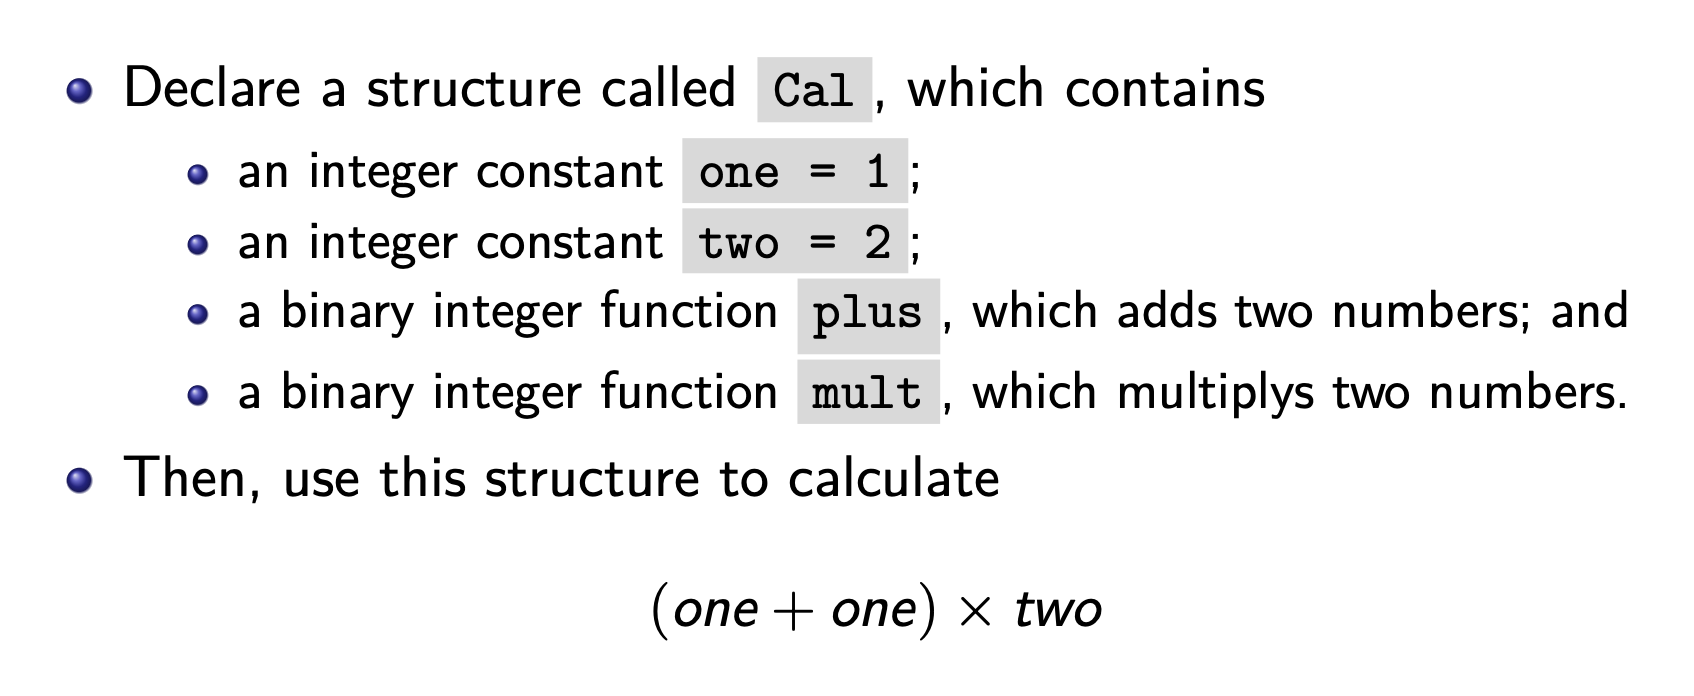

In [9]:
module Cal = struct
  let one = 1
  let two = 2
  let plus x y = x + y
  let mult x y = x * y
end


module Cal :
  sig
    val one : int
    val two : int
    val plus : int -> int -> int
    val mult : int -> int -> int
  end


In [ ]:
Cal.mult (Cal.plus Cal.one Cal.one) Cal.two;;
Cal.(mult (plus one one) two);;

- : int = 4


- : int = 4


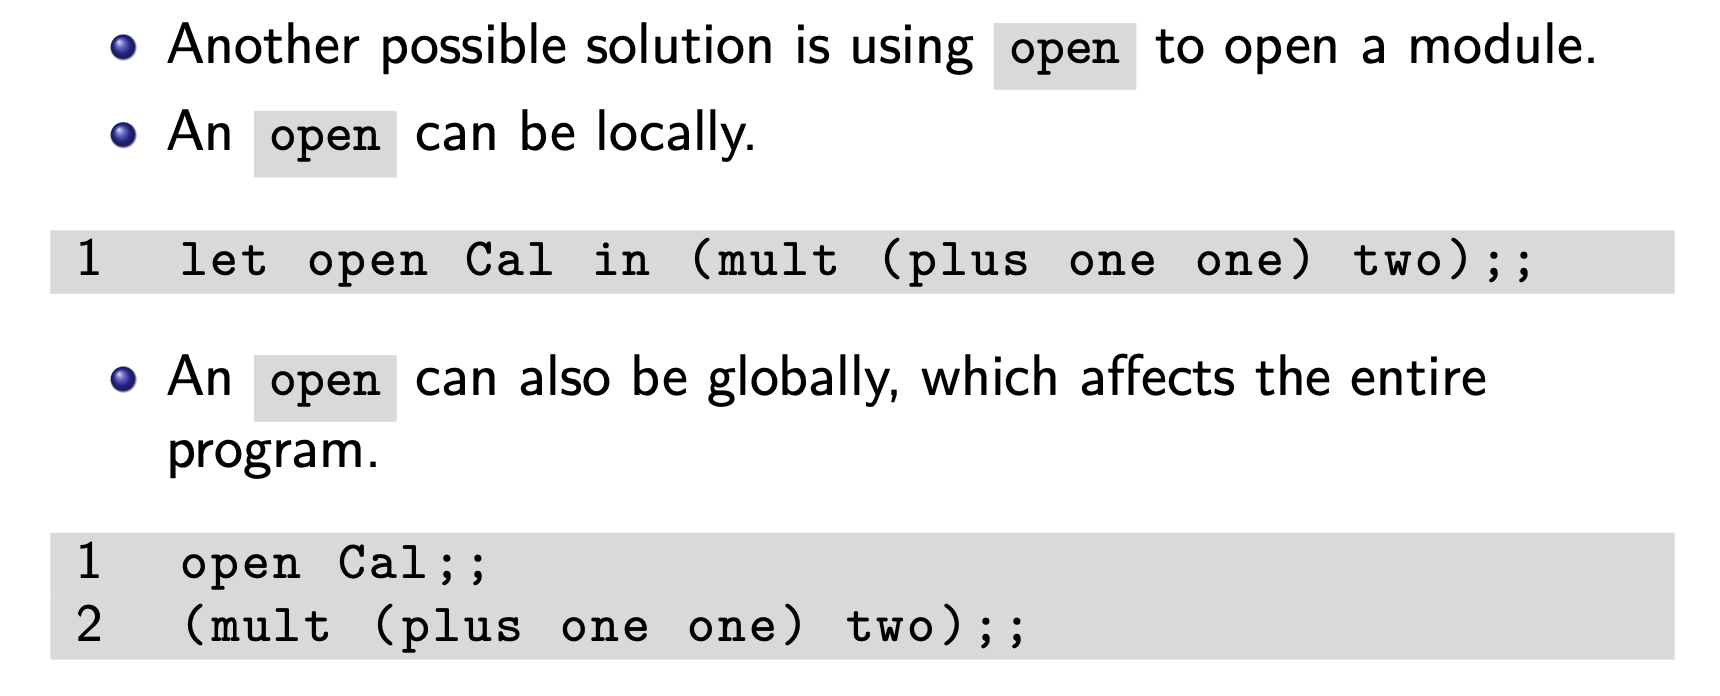
dune init proj root .  
[dune build](https://dune.readthedocs.io/en/stable/usage.html#finding-the-root)

In [16]:
let open Cal in ( mult ( plus one one) two);;

open Cal;;

(mult(plus one one) two);;

- : int = 4


- : int = 4


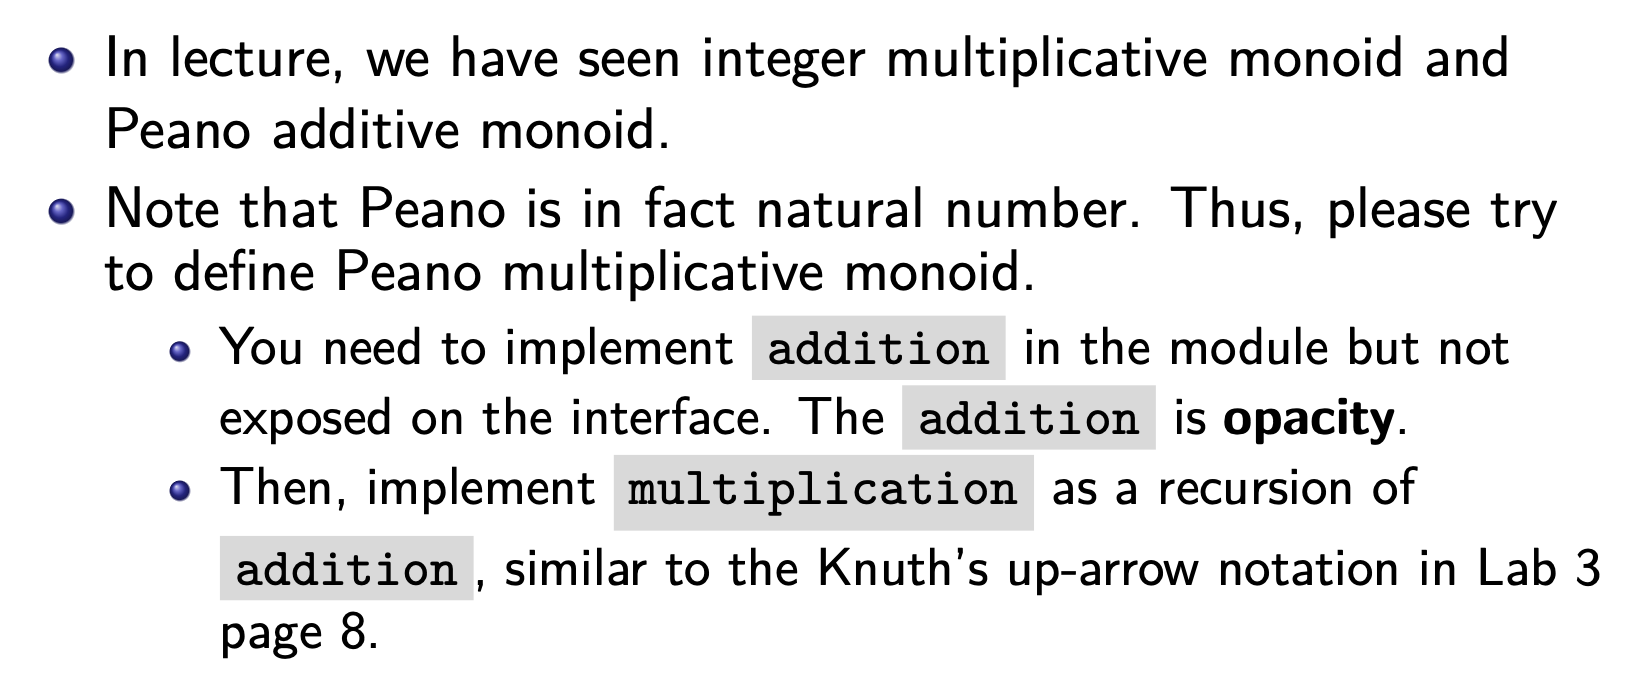

In [ ]:
module type Monoid = sig
  type element
  val zero: element
  val ( + ) : element -> element -> element
  val print : element -> unit
end;;

type peano = O | Cons of unit * peano;;

module PeanoMonoid : 
  Monoid with type element = peano  = struct
  type element = peano
  let zero = Cons ((), O)
  let suc x = Cons ((), x) 
  let rec addtion a = function
  | O -> a
  | Cons ((), t) -> suc (addtion a t)
  let rec ( + ) a = function
  | O -> O
  | Cons ((), t) -> addtion a (( + ) a t)
  let rec print = function
  | O -> print_endline "O"
  | Cons ((), t)  -> print_string "S ";print t
end;;

open PeanoMonoid;;
let one = Cons ((), O);;
let two = Cons ((), one);;
let three = Cons ((), two);;
PeanoMonoid.( + ) two three;;


module type Monoid =
  sig
    type element
    val zero : element
    val ( + ) : element -> element -> element
    val print : element -> unit
  end


type peano = O | Cons of unit * peano


module PeanoMonoid :
  sig
    type element = peano
    val zero : element
    val ( + ) : element -> element -> element
    val print : element -> unit
  end


val one : peano = Cons ((), O)


val two : peano = Cons ((), Cons ((), O))


val three : peano = Cons ((), Cons ((), Cons ((), O)))


- : PeanoMonoid.element =
Cons ((), Cons ((), Cons ((), Cons ((), Cons ((), Cons ((), O))))))


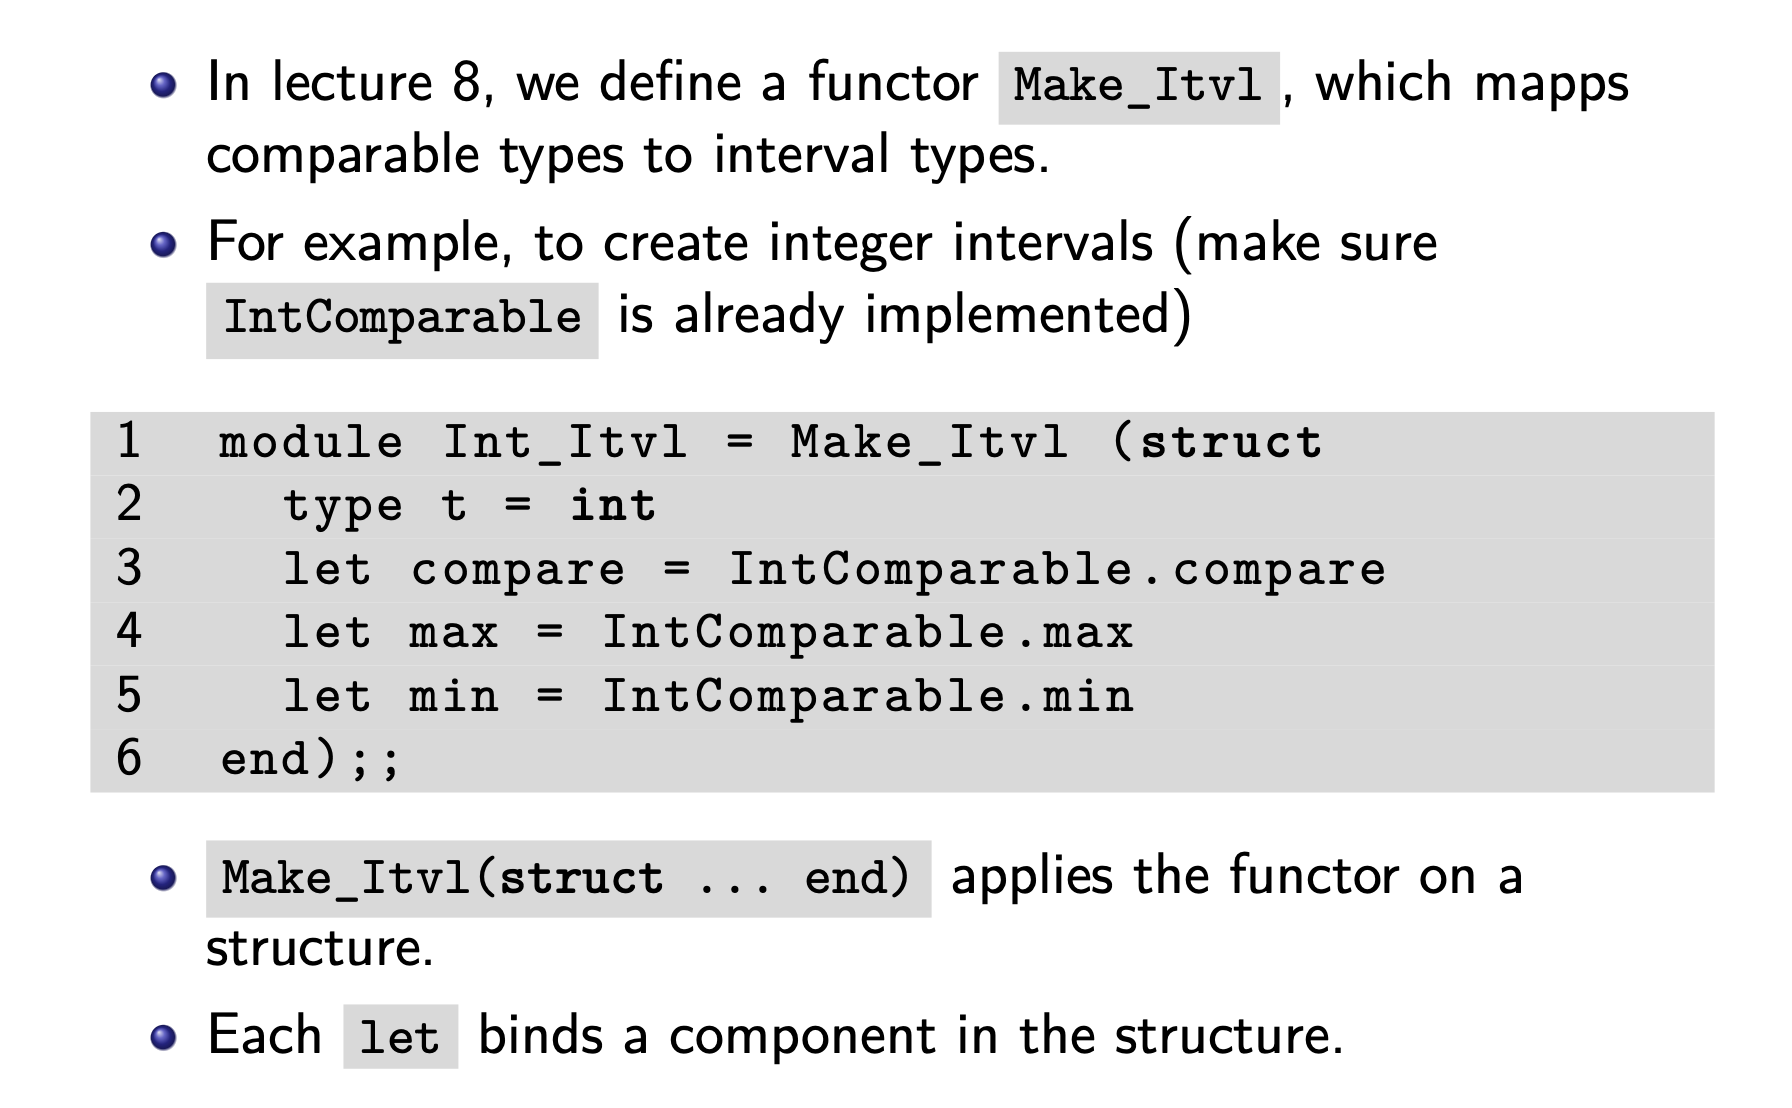

In [ ]:
type ternary = Larger | Equal | Smaller;;

module type Comparable = sig
  type t
  val compare : t -> t -> ternary
  val max: t -> t -> t
  val min: t -> t -> t
end;;

module Int_Comparable : Comparable with type t = int
  = struct
  type t = int
    let compare a b = 
      if a > b then Larger
      else if a = b then Equal
      else Smaller
    let max a b = if a > b then a else b
    let min a b = if a < b then a else b
end;;

module Make_Itvl (Bound : Comparable) = struct
  type i = Empty | Itvl of Bound.t * Bound.t
  let create a b =
  match Bound.compare a b with
  | Equal -> Empty
  | Larger -> Itvl (b, a)
  | Smaller -> Itvl (a, b)
  let intersect t1 t2 =
  match t1,t2 with
  | Itvl (l1, u1), Itvl (l2, u2) ->
  if not (Bound.compare u1 l2 = Larger) ||
  not (Bound.compare u2 l1 = Larger) then
  Empty
  else create (max l1 l2) (min u1 u2)
  | _ -> Empty
end;;

module Int_Itvl = Make_Itvl (struct
  type t = int
  let compare = Int_Comparable.compare
  let max = Int_Comparable.max
  let min = Int_Comparable.min
end);;

type ternary = Larger | Equal | Smaller


module type Comparable =
  sig
    type t
    val compare : t -> t -> ternary
    val max : t -> t -> t
    val min : t -> t -> t
  end


module Int_Comparable :
  sig
    type t = int
    val compare : t -> t -> ternary
    val max : t -> t -> t
    val min : t -> t -> t
  end


module Make_Itvl :
  functor (Bound : Comparable) ->
    sig
      type i = Empty | Itvl of Bound.t * Bound.t
      val create : Bound.t -> Bound.t -> i
      val intersect : i -> i -> i
    end


module Int_Itvl :
  sig
    type i = Empty | Itvl of int * int
    val create : int -> int -> i
    val intersect : i -> i -> i
  end


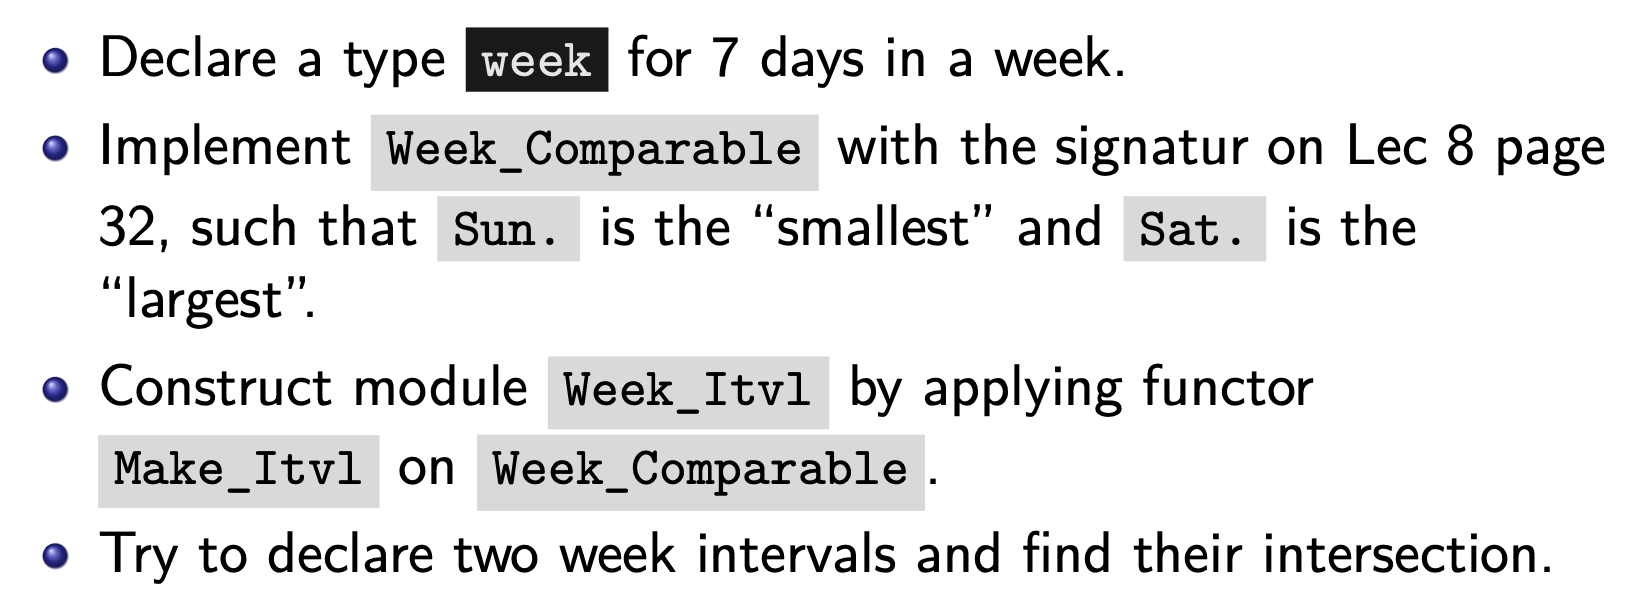

In [36]:
type week = Sun | Mon | Tue | Wed | Thu | Fri | Sat;;

let week_to_int = function
  | Sun -> 0
  | Mon -> 1
  | Tue -> 2
  | Wed -> 3
  | Thu -> 4
  | Fri -> 5
  | Sat -> 6

module Week_Comparable : Comparable with type t = week
  = struct
  type t = week
    let compare a b = 
      if  week_to_int a > week_to_int b then Larger
      else if week_to_int a = week_to_int b then Equal
      else Smaller
    let max a  b = if week_to_int a > week_to_int b then a else b
    let min a  b = if week_to_int a < week_to_int b then a else b
end;;

module Week_Itvl = Make_Itvl (struct
  type t = week
  let compare = Week_Comparable.compare
  let max = Week_Comparable.max
  let min = Week_Comparable.min
end);;

let week1 = Week_Itvl.create Mon Thu;;
let week2 = Week_Itvl.create Tue Fri;;

let itvl = Week_Itvl.intersect week1 week2;;

type week = Sun | Mon | Tue | Wed | Thu | Fri | Sat


val week_to_int : week -> int = <fun>


module Week_Comparable :
  sig
    type t = week
    val compare : t -> t -> ternary
    val max : t -> t -> t
    val min : t -> t -> t
  end


module Week_Itvl :
  sig
    type i = Empty | Itvl of week * week
    val create : week -> week -> i
    val intersect : i -> i -> i
  end


val week1 : Week_Itvl.i = Week_Itvl.Itvl (Mon, Thu)


val week2 : Week_Itvl.i = Week_Itvl.Itvl (Tue, Fri)


val itvl : Week_Itvl.i = Week_Itvl.Itvl (Tue, Thu)
